
# Lab 11: Understanding the data. 

Last 2 classes we have been working on understanding data. In this lab you will apply that.


**Context**
The goal of this lab is to understand a large dataset of 27901 rows and 18 columns Perform Exploratory Data Analysis (EDA) on the data. Look at how the data effects the end result **depression** (yes/no)
## Part 1
- Load and get a basic understanding of the dataset
- Clean up the data 
    - examples:
        - check and fix any missing data 
        - use both Hot and integer encoding
        - convert any numeric data from strings to ints
- Perform Exploratory Data Analysis (EDA) 
    - I will leave it to you to understand and explore this. 
        - Histplot
        - Countplot
        - Correlation
        - Heatmaps
        - boxplots
        - have fun

Make sure to communicate to me along the way. I want your to tell me what your assumptions are what your learning about the data and what you learned with EDA.  There are 18 data points for each student I expect an perform EDA on most of those points like what we did in class with MPG. 

##### ***Remember*** how we did a `sns.pairplot(df[[ "cylinders", "mpg","model_year"]])` and `sns.pairplot(df[["mpg", "horsepower", "weight", "displacement"]])` 


## Part 2: 
Model the data using what we learned in `Linear_Regression_Part2.ipynb` predict if a student will or will not have `Depression` 

- Perform linear Regression on the model using `DecisionTreeRegressor`
- Have at least 5 different models and how dropping a column effects the data predictor 
- Once you find a model with a good prediction play with the size of your test and training data to understand how it affects your model
    - compare the `R²` score  and the `MAE` to show improvement or degradation of the model.

**Remember to have fun with this**

----------------------------------------------------------------------------------------------------------------------------------------------

# PART 1

In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("student_depression_dataset.csv")
#your code from the bottom


print("Shape:", df.shape)
print("Columns:", df.columns.to_list())
print("Data Types:", df.dtypes)

display(df.head())



Shape: (27901, 18)
Columns: ['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Sleep Duration', 'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?', 'Work/Study Hours', 'Financial Stress', 'Family History of Mental Illness', 'Depression']
Data Types: id                                         int64
Gender                                    object
Age                                      float64
City                                      object
Profession                                object
Academic Pressure                        float64
Work Pressure                            float64
CGPA                                     float64
Study Satisfaction                       float64
Job Satisfaction                         float64
Sleep Duration                            object
Dietary Habits                            object
Degree                                    object
Have you eve

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


In [ ]:
print("Missings Values: ", df.isnull()) #does work i think!
#I spent too long on this, it is confusing me so bad
#tried to use your notes in combo with the evil ai, kind of got the output I wanted, sorry
for column in df.columns:
    if df[column].dtype == 'object':
        try:
            df[column] = pd.to_numeric(df[column])
        except:
            pass
numeric_columns = df.select.dtypes(include = ['int64','float64']).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

categorical_columns = df.select_dtypes(include = ['object']).columns
for column in categorical_columns:
    df[column] = df[column].fillna(df[column].mode()[0])

Missings Values:            id  Gender    Age   City  Profession  Academic Pressure  \
0      False   False  False  False       False              False   
1      False   False  False  False       False              False   
2      False   False  False  False       False              False   
3      False   False  False  False       False              False   
4      False   False  False  False       False              False   
...      ...     ...    ...    ...         ...                ...   
27896  False   False  False  False       False              False   
27897  False   False  False  False       False              False   
27898  False   False  False  False       False              False   
27899  False   False  False  False       False              False   
27900  False   False  False  False       False              False   

       Work Pressure   CGPA  Study Satisfaction  Job Satisfaction  \
0              False  False               False             False   
1              

AttributeError: 'DataFrame' object has no attribute 'select'

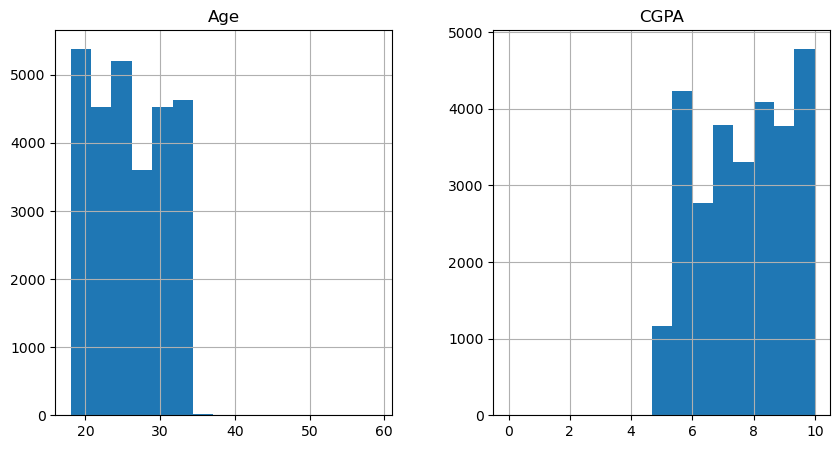

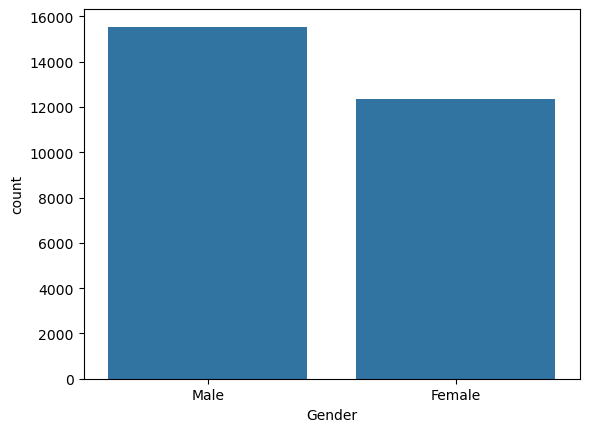

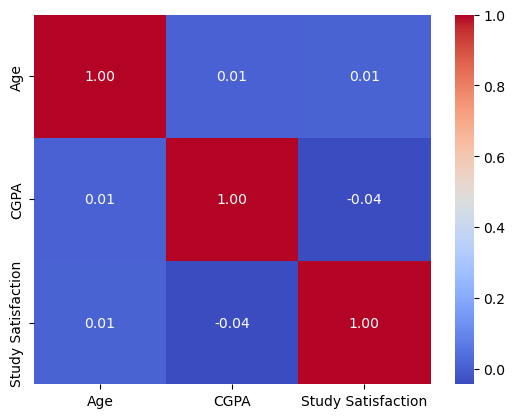

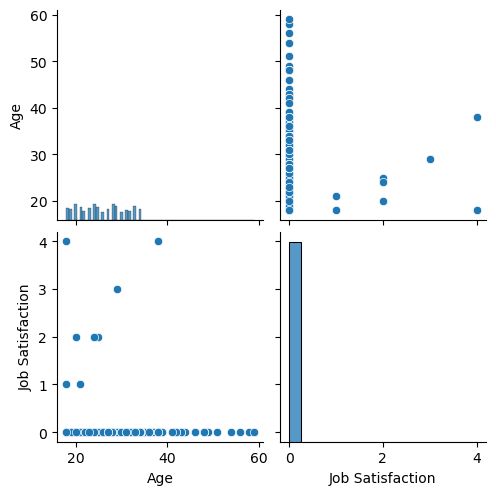

In [ ]:
#Histogram
#not sure how to combine them, but they made seperate graphs
df[['Age', 'CGPA']].hist(bins=15, figsize = (10,5))
plt.show()
#CountPlot
sns.countplot(x='Gender', data=df)
plt.show()
#Heat Map
#took a while to get it to show, not sure if it looks right
corr = df[['Age', 'CGPA', 'Study Satisfaction']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()
#Your Example
#not sure if this worked correctly, sorry
sns.pairplot(df[[ "Age", "Profession","Job Satisfaction"]])
plt.show()
#kind of hard i guess to pick what to put against what
#the data types have to match or properly coordinate, thats what i know
#asked for briannas help on these

# PART 2

In [ ]:
#used evil ai to help a bit with this section
#very confusing, still getting the string/float error and tried to include that function to numerate them, likely did not work
#please forgive me I am so tired from work
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score

x = df.drop(['Depression'], axis = 1)
y = df['Depression']

def model(x,y,test_size=.3):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=test_size, random_state = 42)
    model = DecisionTreeRegressor(random_state =42)
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    mean = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    print (f"Test Size: {test_size}")
    print (f"Mean Absolute Error: {mean:.4f}")
    print (f"R2 Score : {r2:.4f}")
    
    return mean, r2

#keep getting a float erro because some answers are not numerical
#asked evil ai for help
print(df.dtypes[df.dtypes == 'object'])
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1, 'Non-binary': 2})
df['Depression'] = df['Depression'].map({'No': 0, 'Yes': 1})
df = pd.get_dummies(df, drop_first=True)
print(df.dtypes)

#i know why this doesnt work but idk how to fix it, sorry again
print("Model 1: All features")
model(x, y)


Gender                                   object
City                                     object
Profession                               object
Sleep Duration                           object
Dietary Habits                           object
Degree                                   object
Have you ever had suicidal thoughts ?    object
Financial Stress                         object
Family History of Mental Illness         object
dtype: object
id                                        int64
Gender                                    int64
Age                                     float64
Academic Pressure                       float64
Work Pressure                           float64
                                         ...   
Financial Stress_3.0                       bool
Financial Stress_4.0                       bool
Financial Stress_5.0                       bool
Financial Stress_?                         bool
Family History of Mental Illness_Yes       bool
Length: 115, dtype: object

ValueError: could not convert string to float: 'Male'

From: https://www.kaggle.com/datasets/adilshamim8/student-depression-dataset/data


Field Descriptions

**id** - A unique identifier assigned to each student record in the dataset.

**Gender** - The gender of the student (e.g., Male, Female, Other). This helps in analyzing gender-specific trends in mental health.

**Age** - The age of the student in years.

**City** - The city or region where the student resides, providing geographical context for the analysis.

**Profession** - The field of work or study of the student, which may offer insights into occupational or academic stress factors.

**Academic Pressure** - A measure indicating the level of pressure the student faces in academic settings. This could include stress from exams, assignments, and overall academic expectations.

**Work Pressure** - A measure of the pressure related to work or job responsibilities, relevant for students who are employed alongside their studies.

**CGPA** - The cumulative grade point average of the student, reflecting overall academic performance.

**Study Satisfaction** - An indicator of how satisfied the student is with their studies, which can correlate with mental well-being.

**Job Satisfaction** - A measure of the student’s satisfaction with their job or work environment, if applicable.

**Sleep Duration** - The average number of hours the student sleeps per day, which is an important factor in mental health.

**Dietary Habits** - An assessment of the student’s eating patterns and nutritional habits, potentially impacting overall health and mood.

**Degree** - The academic degree or program that the student is pursuing.

**Have you ever had suicidal thoughts ?** - A binary indicator (Yes/No) that reflects whether the student has ever experienced suicidal ideation.

**Work/Study Hours** - The average number of hours per day the student dedicates to work or study, which can influence stress levels.

**Financial Stress** - A measure of the stress experienced due to financial concerns, which may affect mental health.

**Family History of Mental Illness** - Indicates whether there is a family history of mental illness (Yes/No), which can be a significant factor in mental health predispositions.

**Depression** - The target variable that indicates whether the student is experiencing depression (Yes/No).

------------------------------------------------------------------------------------------------------------------------------------------------

*Provided for reference only*
``` python 
import kagglehub
import shutil

# Download latest version
path = kagglehub.dataset_download("adilshamim8/student-depression-dataset")

#move the dowload to the current directory
shutil.move(path, "./Lab_11_dataset")
````

In [8]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# loading the dataset
df = pd.read_csv("student_depression_dataset.csv")
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di